# Stocastic Gradient Descent

Datasets can often approach such sizes as m = 100,000,000. In such cases, a single step in descent will need to make a summation over all one hundred million examples. This situation can be eliminated using an approach called Stocastic Gradient Descent (SGD).

Let's make use of sklearn's SGDRegressor to compute the price of houses from Boston dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

### Loading the Dataset

Let's use the boston dataset from Scikit learn to implement SGD.

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = pd.DataFrame(data = load_boston().data, columns = load_boston().feature_names)
data['Price'] = load_boston().target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

Usually SGD is applied to dataset with greater m values (order of 100 thousands). For the choosen boston dataset, we have 506 entries and 13 features. 

### Standardization

Let's separate the target and features from the dataset and perform feature scaling

In [5]:
X = data.drop('Price', axis = 1)
y = data['Price']

print(X.shape, y.shape)

X[0:2]

(506, 13) (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std[0:2]

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937]])

### Let's try SGD

In [7]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test = train_test_split(X_std, y, test_size = 0.3)

In [8]:
# Train the model using training set

from sklearn.linear_model import SGDRegressor

model = SGDRegressor(alpha = 0.15, max_iter = 150) #instantiation

model.fit(X_Train, y_Train) #training the model with learning rate = 0.15

SGDRegressor(alpha=0.15, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=150,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [9]:
# Model parameters

model.coef_

array([-4.75357987e-01,  4.97928787e-01, -3.33016560e-01,  9.07387895e-01,
       -8.91341856e-01,  2.42024624e+00, -2.79664233e-03, -1.91228075e+00,
        7.70278186e-01, -5.45418136e-01, -1.76546057e+00,  1.08496158e+00,
       -3.87012627e+00])

In [10]:
# Prediction 

predictions = model.predict(X_Test)

predictions[0:5]

array([25.8060811 , 26.35349165, 29.67977088, 17.42536403, 20.39577533])

In [11]:
# Evaluation

from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(predictions, y_Test))

print ("Root Mean Square Error: ", rmse)

Root Mean Square Error:  4.515823668328864


Text(0, 0.5, 'Actual y')

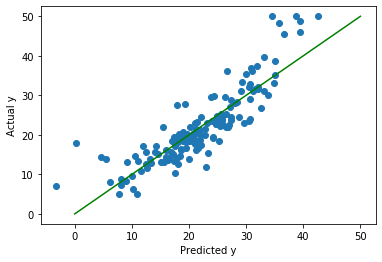

In [12]:
# plotting!
plt.scatter(predictions, y_Test)
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')